In [2]:
import os
import matplotlib.pyplot as plt

In [3]:
from vlmreranker.qwen3_vl_reranker import Qwen3VLReranker

# Specify the model path
model_name_or_path = "Qwen/Qwen3-VL-Reranker-2B"

# Initialize the Qwen3VLEmbedder model
model = Qwen3VLReranker(model_name_or_path=model_name_or_path)

In [29]:
def rank_images(path, query, instruction = None):
    # Read all images from the specified directory
    image_paths = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
    # Prepare the input for the model
    inputs = {
        "query": {"text": query},
        "documents": [{"image": img_path} for img_path in image_paths],
        "fps": 1.0
    }
    
    if instruction:
        inputs["query"]["instruction"] = instruction
    
    # Get the relevance scores for each image
    scores = model.process(inputs)
    
    # plot the 3 images by their scores
    sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for ax, idx in zip(axes, sorted_indices):
        img = plt.imread(image_paths[idx])
        ax.imshow(img)
        ax.set_title(f"Score: {scores[idx]:.4f}")
        ax.axis('off')
    
    # print query, instruction, and scores per image
    print(f"Query: {query}")
    if instruction:
        print(f"Instruction: {instruction}")
    for idx in sorted_indices:
        print(f"Image: {image_paths[idx]}, Score: {scores[idx]:.4f}")

    

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2919: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


Query: red line over the pedestrians
Image: ./candidates/pedestrians/00aec7bb44f0552a_2.jpg, Score: 0.6663
Image: ./candidates/pedestrians/00aec7bb44f0552a_3.jpg, Score: 0.6404
Image: ./candidates/pedestrians/00aec7bb44f0552a_1.jpg, Score: 0.6096


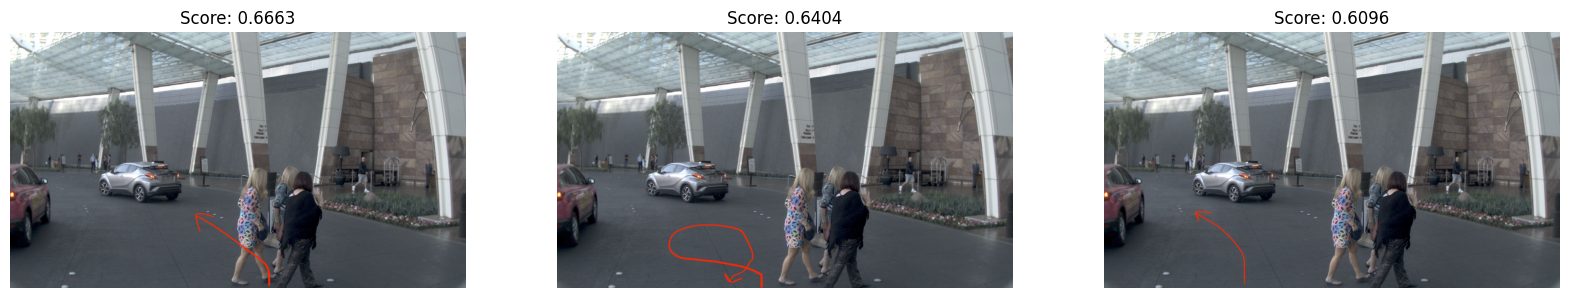

In [30]:
rank_images("./candidates/pedestrians", "red line over the pedestrians") # drive over pedestrians 

Query: red line avoiding pedestrians
Image: ./candidates/pedestrians/00aec7bb44f0552a_3.jpg, Score: 0.5920
Image: ./candidates/pedestrians/00aec7bb44f0552a_2.jpg, Score: 0.5747
Image: ./candidates/pedestrians/00aec7bb44f0552a_1.jpg, Score: 0.5571


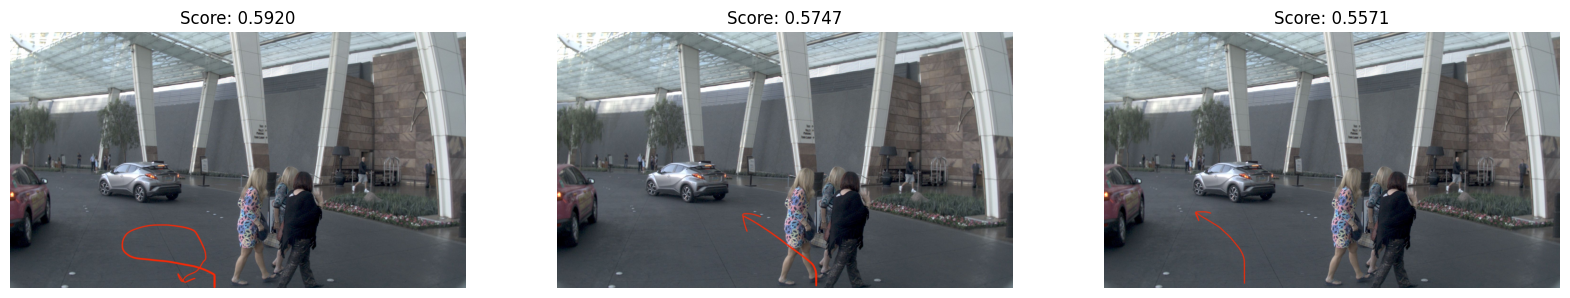

In [31]:
rank_images("./candidates/pedestrians", "red line avoiding pedestrians") # drive avoiding pedestrians 

Query: red line following black SUV
Image: ./candidates/follow_car/0dec29a68abd5e4e_3.jpg, Score: 0.6979
Image: ./candidates/follow_car/0dec29a68abd5e4e_1.jpg, Score: 0.6786
Image: ./candidates/follow_car/0dec29a68abd5e4e_2.jpg, Score: 0.6340


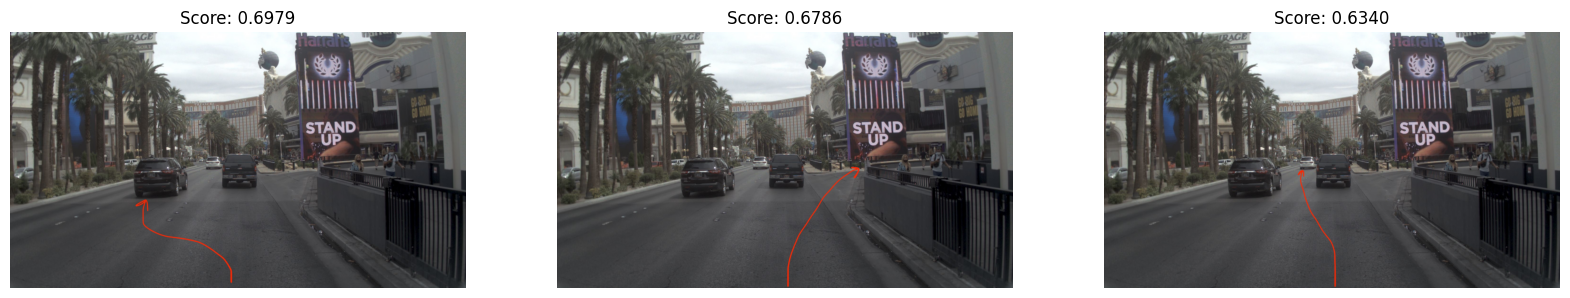

In [32]:
rank_images("./candidates/follow_car", "red line following black SUV")

Query: red line following white SUV
Image: ./candidates/follow_car/0dec29a68abd5e4e_3.jpg, Score: 0.5200
Image: ./candidates/follow_car/0dec29a68abd5e4e_2.jpg, Score: 0.4911
Image: ./candidates/follow_car/0dec29a68abd5e4e_1.jpg, Score: 0.4907


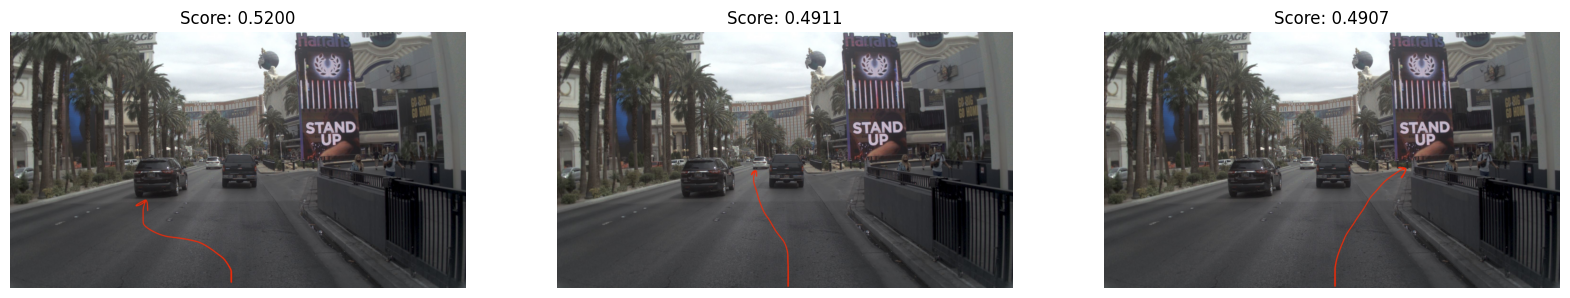

In [33]:
rank_images("./candidates/follow_car", "red line following white SUV")

Query: red line following white car
Image: ./candidates/follow_car/0dec29a68abd5e4e_2.jpg, Score: 0.4705
Image: ./candidates/follow_car/0dec29a68abd5e4e_1.jpg, Score: 0.4702
Image: ./candidates/follow_car/0dec29a68abd5e4e_3.jpg, Score: 0.4522


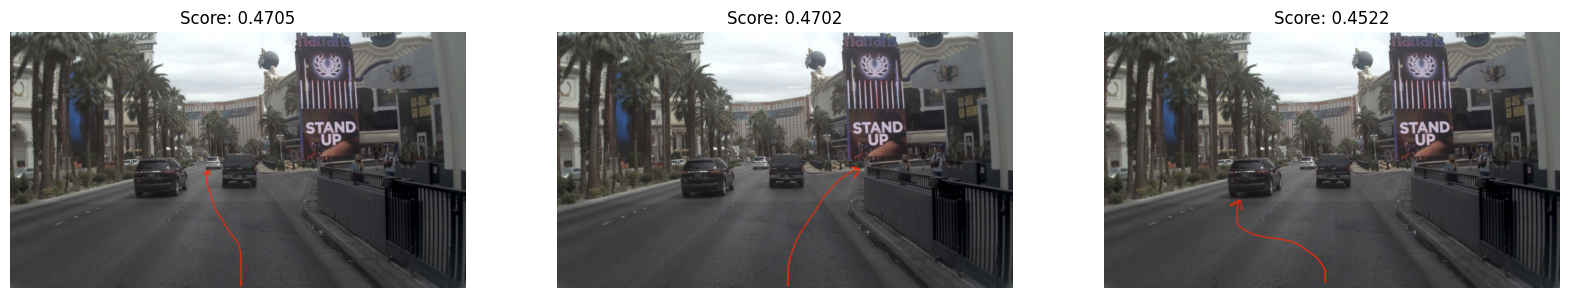

In [34]:
rank_images("./candidates/follow_car", "red line following white car")

Query: red line turns to Harrahs
Image: ./candidates/follow_car/0dec29a68abd5e4e_1.jpg, Score: 0.7704
Image: ./candidates/follow_car/0dec29a68abd5e4e_2.jpg, Score: 0.7551
Image: ./candidates/follow_car/0dec29a68abd5e4e_3.jpg, Score: 0.7482


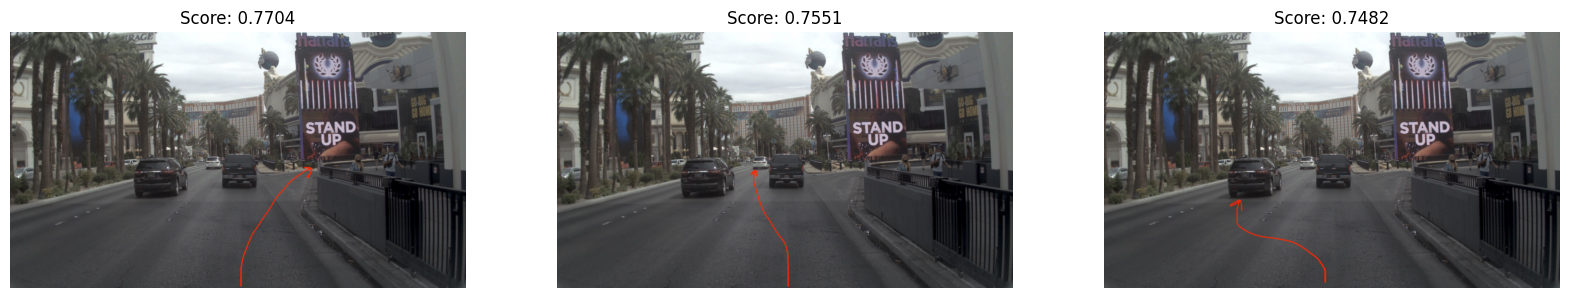

In [35]:
rank_images("./candidates/follow_car", "red line turns to Harrahs")

Query: red line joins white taxis
Image: ./candidates/park/1e9660b19c3b555a_2.jpg, Score: 0.4947
Image: ./candidates/park/1e9660b19c3b555a_3.jpg, Score: 0.4651
Image: ./candidates/park/1e9660b19c3b555a_1.jpg, Score: 0.4416


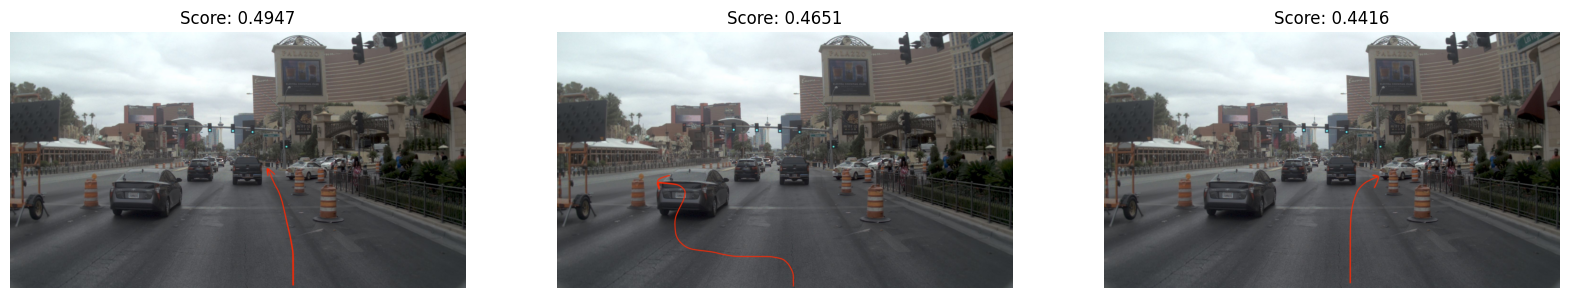

In [36]:
rank_images("./candidates/park", "red line joins white taxis")

Query: red line goes straight
Image: ./candidates/park/1e9660b19c3b555a_2.jpg, Score: 0.5713
Image: ./candidates/park/1e9660b19c3b555a_3.jpg, Score: 0.5161
Image: ./candidates/park/1e9660b19c3b555a_1.jpg, Score: 0.5072


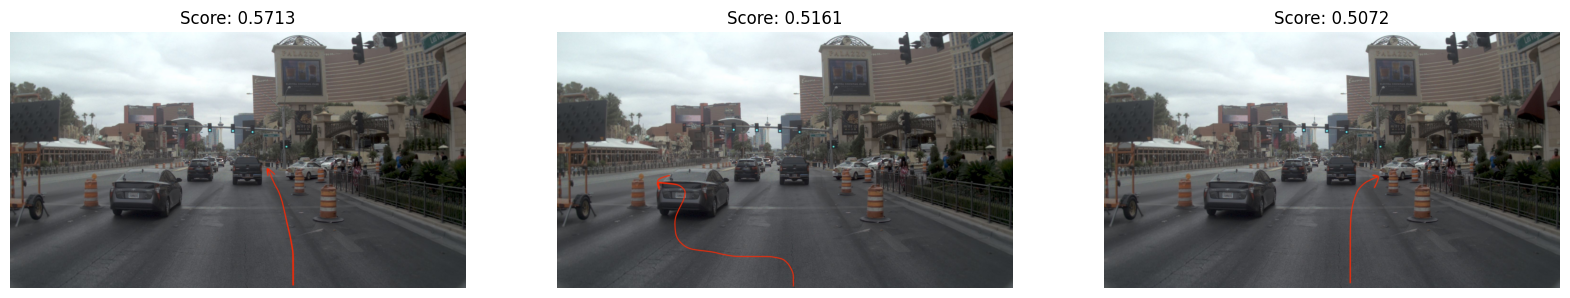

In [37]:
rank_images("./candidates/park", "red line goes straight")

Query: red line goes left
Image: ./candidates/park/1e9660b19c3b555a_2.jpg, Score: 0.5843
Image: ./candidates/park/1e9660b19c3b555a_1.jpg, Score: 0.5838
Image: ./candidates/park/1e9660b19c3b555a_3.jpg, Score: 0.5764


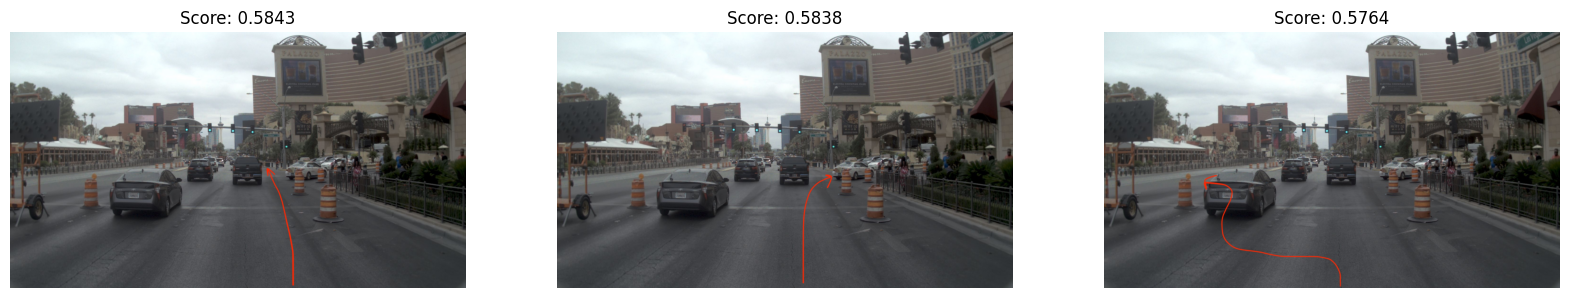

In [38]:
rank_images("./candidates/park", "red line goes left")